<table>
<tr><td><img style="height: 150px;" src="images/geo_hydro1.jpg"></td>
<td bgcolor="#FFFFFF">
    <p style="font-size: xx-large; font-weight: 900; line-height: 100%">AG Dynamics of the Earth</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Jupyter notebooks</p>
    <p style="font-size: large; color: rgba(0,0,0,0.5);">Georg Kaufmann</p>
    </td>
</tr>
</table>

# Dynamic systems: 2. Flux
## Blautopf example
----
*Georg Kaufmann,
Geophysics Section,
Institute of Geological Sciences,
Freie Universität Berlin,
Germany*

This notebook compiles recharge and discahrge data from the Blautopf catchment in the Swabian Alb.

----
# Blautopf recharge and discharge data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

----
## Blautopf spring

<img style="width: 550px;" src="images/Blautopf_GeorgKaufmann.jpg">

The resurgence of the Blautopf is located in an old meander
of the Paleo-Danube, at an altitude of 512 m. The Vauclusian
spring emerges at the side of the valley, between the
Quaternary gravels and the ki2-Limestone. The valley is part
of the old Paleo-Danube. 

In late Miocene and Pliocene
times, the location of the spring was at around 670 m altitude,
still close to the plateau surface. Then, the valley
floor was carved out, being at 512 m around 1.4 Myr years
ago (Donau), at 502 m around 800,000 years ago (Gu¨nz),
down to 477 m around 200,000 years ago (Riss). Around
the last interglacial (120,000 years ago, Wu¨rm), the Paleo-
Danube left the valley, and the remaining smaller creeks
were unable to keep it sediment-free. Thus, about 35 m of
Pleistocene gravels have been deposited. The water emerging
from the Blautopf cave had to find a new way out
through the gravels, creating the Blautopf spring (Villinger,
1987), at 512 m altitude, including a 4 m artificial weir (see
Fig. 4).

The Blautopf is the resurgence of a large mainly phreatic
cave, draining an area of 160 km2. The discharge is very variable,
on average 2100 l/s, with a range between 300 and
30,000 l/s. The water emerging in the Blautopf spring is
mainly from precipitation in the catchment. Average precipitation
is around 900 mm/yr, while the recharge is
roughly half of that value, 450 mm/yr.

Taken from: <br>
Kaufmann & Romanov (2008):
[**Cave development in the Swabian Alb, South-West Germany: A numerical perspective.**](http://userpage.fu-berlin.de/~geodyn/publications/pdf/Kaufmann-etal2008_jhydrol_349_pp302-317.pdf)
*J. Hydrol.*, 349, 302-317.


----
## Getting hydrological data

1. For the **precipitation** data, we search on the web server of the **Deutscher Wetterdienst**. Here,
a climate data repository in maintained under
[Climate data center](https://www.dwd.de/DE/klimaumwelt/cdc/cdc_node.html).
Hourly precipitation data are found under `/climate_environment/CDC/observations_germany/climate/hourly`.

2. For the **discharge** data, we use the web serverf rom the **Landesanstalt für Umwelt Baden-Württemberg**.
The service is
[Daten- und Kartendienst](https://udo.lubw.baden-wuerttemberg.de/public/pages/home/welcome.xhtml) under
`Wasser->Oberflächengewässer->Hydrologische Landespegel`.

----
## Reading data
Read precipitation data from Merklingen station and
discharge of the Blau river from Blaubeuren.

In [2]:
Blautopf_Q = np.loadtxt('data/Blautopf2020_discharge_Q.x')
Blautopf_h = np.loadtxt('data/Blautopf2020_discharge_h.x')
Merklingen_N = np.loadtxt('data/Merklingen2020_recharge_N.x')

In [3]:
print(Blautopf_Q.shape)
print(Blautopf_Q[:,5].min())
print(Blautopf_Q[:,5].max())
print(Blautopf_h.shape)
print(Blautopf_h[:,5].min())
print(Blautopf_h[:,5].max())
#print(Merklingen_N.shape)
#print(Merklingen_N[:,1].min())
#print(Merklingen_N[:,1].max())

(8783, 6)
0.06
21.38
(8784, 6)
72.0
152.0


In [4]:
print('Annual precipitation N[mm/yr]: ',Merklingen_N[:,1].sum())

Annual precipitation N[mm/yr]:  664.7


Convert the time information to the `datetime` format:

In [5]:
Q_times = []
for i in range(Blautopf_Q.shape[0]):
    Q_times.append(datetime.datetime(int(Blautopf_Q[i,0]),
                                     int(Blautopf_Q[i,1]),
                                     int(Blautopf_Q[i,2]),
                                     int(Blautopf_Q[i,3]),
                                     int(Blautopf_Q[i,4]),0))
for i in range(10):
    print(Q_times[i])

2020-01-01 00:00:00
2020-01-01 01:00:00
2020-01-01 02:00:00
2020-01-01 03:00:00
2020-01-01 04:00:00
2020-01-01 05:00:00
2020-01-01 06:00:00
2020-01-01 07:00:00
2020-01-01 08:00:00
2020-01-01 09:00:00


In [6]:
h_times = []
for i in range(Blautopf_h.shape[0]):
    h_times.append(datetime.datetime(int(Blautopf_h[i,0]),
                                     int(Blautopf_h[i,1]),
                                     int(Blautopf_h[i,2]),
                                     int(Blautopf_h[i,3]),
                                     int(Blautopf_h[i,4]),0))
for i in range(10):
    print(h_times[i])

2020-01-01 00:00:00
2020-01-01 01:00:00
2020-01-01 02:00:00
2020-01-01 03:00:00
2020-01-01 04:00:00
2020-01-01 05:00:00
2020-01-01 06:00:00
2020-01-01 07:00:00
2020-01-01 08:00:00
2020-01-01 09:00:00


In [7]:
N_times = []
for i in range(Merklingen_N.shape[0]):
    yyyy = str(Merklingen_N[i,0])[0:4]
    mm   = str(Merklingen_N[i,0])[4:6]
    dd   = str(Merklingen_N[i,0])[6:8]
    hh   = str(Merklingen_N[i,0])[8:10]
    N_times.append(datetime.datetime(int(yyyy),int(mm),int(dd),int(hh),0))
for i in range(10):
    print(N_times[i])

2020-01-01 00:00:00
2020-01-01 01:00:00
2020-01-01 02:00:00
2020-01-01 03:00:00
2020-01-01 04:00:00
2020-01-01 05:00:00
2020-01-01 06:00:00
2020-01-01 07:00:00
2020-01-01 08:00:00
2020-01-01 09:00:00


----
## Plotting data
Plot precipitation at Merklingen and stage and discharge of the Blau river:

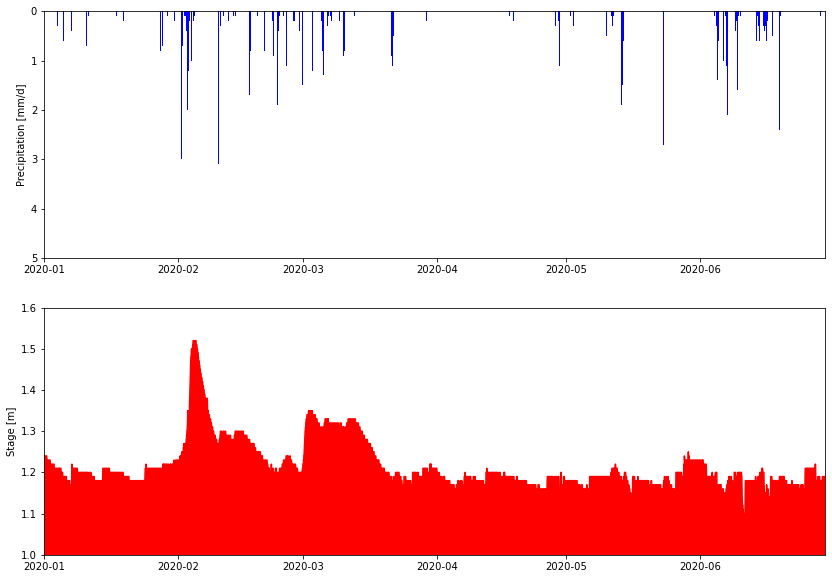

In [8]:
fig,axs = plt.subplots(2,1,figsize=(14,10))
axs[0].set_xlim([datetime.datetime(2020, 1, 1, 0, 0),datetime.datetime(2020, 6,30, 0, 0)])
axs[0].set_ylim([5,0])
axs[0].set_ylabel('Precipitation [mm/d]')
axs[0].bar(N_times,Merklingen_N[:,1],width=1/24,color='blue',alpha=1.0)

axs[1].set_xlim([datetime.datetime(2020, 1, 1, 0, 0),datetime.datetime(2020, 6,30, 0, 0)])
axs[1].set_ylim([1.00,1.60])
axs[1].set_ylabel('Stage [m]')
axs[1].fill_between(h_times,Blautopf_h[:,5]/100,1.0,linewidth=1.5,color='red',alpha=1.0)

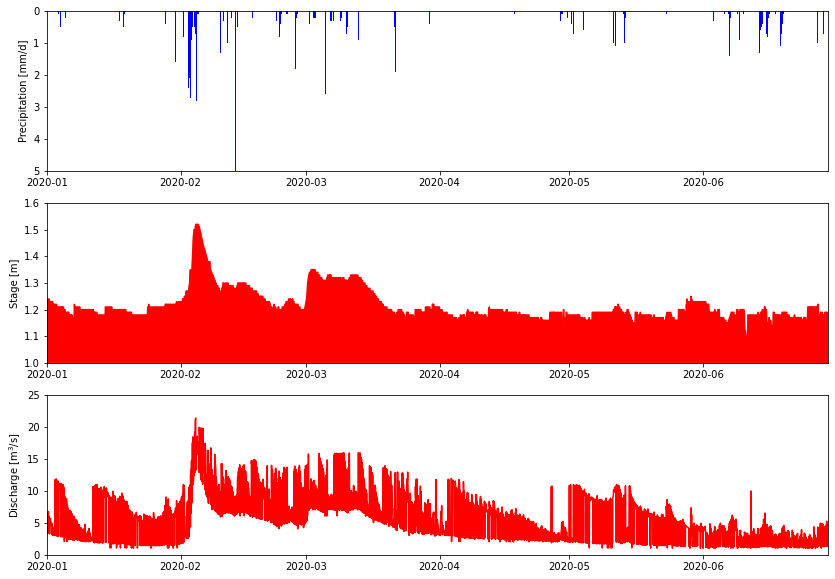

In [9]:
fig,axs = plt.subplots(3,1,figsize=(14,10))
axs[0].set_xlim([datetime.datetime(2020, 1, 1, 0, 0),datetime.datetime(2020, 6,30, 0, 0)])
axs[0].set_ylim([5,0])
axs[0].set_ylabel('Precipitation [mm/d]')
axs[0].bar(N_times,Merklingen_N[:,1],width=1/24,color='blue',alpha=1.0)

axs[1].set_xlim([datetime.datetime(2020, 1, 1, 0, 0),datetime.datetime(2020, 6,30, 0, 0)])
axs[1].set_ylim([1.00,1.60])
axs[1].set_ylabel('Stage [m]')
axs[1].fill_between(h_times,Blautopf_h[:,5]/100,1.0,linewidth=1.5,color='red',alpha=1.0)

axs[2].set_xlim([datetime.datetime(2020, 1, 1, 0, 0),datetime.datetime(2020, 6,30, 0, 0)])
axs[2].set_ylim([0.00,25])
axs[2].set_ylabel('Discharge [m$^3$/s]')
axs[2].plot(Q_times,Blautopf_Q[:,5],linewidth=1.5,color='red',alpha=1.0)

[Simple tank ->](Dynamics_lab02_SimpleTank.ipynb)

... done